In [0]:
from google.colab import files
files.upload()

Saving Severity-of-airplane-accident-master.zip to Severity-of-airplane-accident-master.zip


{'Severity-of-airplane-accident-master.zip': b'PK\x03\x04\n\x00\x00\x00\x00\x00\x08\xb72P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00%\x00\t\x00Severity-of-airplane-accident-master/UT\x05\x00\x01\x90\xfd#^PK\x03\x04\n\x00\x00\x00\x08\x00\x08\xb72P\xf6\xb6[\xc1S\x00\x00\x00h\x00\x00\x00.\x00\t\x00Severity-of-airplane-accident-master/README.mdUT\x05\x00\x01\x90\xfd#^5\xca1\x0e@@\x10\x05\xd0\xde)~\xa2\xa1\xd8{(%N0\x19\x9f\x9d`W\xc6D\xe2\xf6\x1a^\xfdZL\xbc\xe9\x16O\xaaK\x12\xf3s\x97\xc2$\xaa6\xb3D3:g\xd3\xb0\xb2"2q}\x19u\xc1\x9f\xf1gt\x83\xe8F\x07\xc5#C\xebq2,\xac\x96\xbey\x01PK\x03\x04\n\x00\x00\x00\x08\x00\x08\xb72P\x07\x14\xfa\x8b\xaf\x98\x01\x00\xd9\x0f\x03\x00<\x00\t\x00Severity-of-airplane-accident-master/airplane severity.ipynbUT\x05\x00\x01\x90\xfd#^\xec\xbdi\x93\xa3H\x96(\xfa\xfd\xfe\x8a\xb02\xbbV5FO\xb0o\xf5\xba\xc7\x0c\x84v$\x90@\x12\xa2\xab\xad\x8c] @\xecH\x8c\xcd\x7f\xbf\x8e"\x15\x19\xa1\x90\x88\x88\xcc\xec\xb9\xb7\xe7%\xd6\xd5\xa9\x00\xfc\xf8q?\xfb\xf1\x83\xfb\x7f\xfe\xaf

In [0]:
!unzip Severity-of-airplane-accident-master.zip

Archive:  Severity-of-airplane-accident-master.zip
10f6551bff51c6e2ce43af545c73cf3e0be5aa49
   creating: Severity-of-airplane-accident-master/
  inflating: Severity-of-airplane-accident-master/README.md  
  inflating: Severity-of-airplane-accident-master/airplane severity.ipynb  
  inflating: Severity-of-airplane-accident-master/submission.csv  
  inflating: Severity-of-airplane-accident-master/test.csv  
  inflating: Severity-of-airplane-accident-master/train.csv  


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train = pd.read_csv('Severity-of-airplane-accident-master/train.csv')
test = pd.read_csv('Severity-of-airplane-accident-master/test.csv')

In [0]:
train.head(5)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [0]:
train.isnull().sum(), test.isnull().sum()

(Severity                   0
 Safety_Score               0
 Days_Since_Inspection      0
 Total_Safety_Complaints    0
 Control_Metric             0
 Turbulence_In_gforces      0
 Cabin_Temperature          0
 Accident_Type_Code         0
 Max_Elevation              0
 Violations                 0
 Adverse_Weather_Metric     0
 Accident_ID                0
 dtype: int64, Safety_Score               0
 Days_Since_Inspection      0
 Total_Safety_Complaints    0
 Control_Metric             0
 Turbulence_In_gforces      0
 Cabin_Temperature          0
 Accident_Type_Code         0
 Max_Elevation              0
 Violations                 0
 Adverse_Weather_Metric     0
 Accident_ID                0
 dtype: int64)

In [0]:
train.dtypes,test.dtypes

(Severity                    object
 Safety_Score               float64
 Days_Since_Inspection        int64
 Total_Safety_Complaints      int64
 Control_Metric             float64
 Turbulence_In_gforces      float64
 Cabin_Temperature          float64
 Accident_Type_Code           int64
 Max_Elevation              float64
 Violations                   int64
 Adverse_Weather_Metric     float64
 Accident_ID                  int64
 dtype: object, Safety_Score               float64
 Days_Since_Inspection        int64
 Total_Safety_Complaints      int64
 Control_Metric             float64
 Turbulence_In_gforces      float64
 Cabin_Temperature          float64
 Accident_Type_Code           int64
 Max_Elevation              float64
 Violations                   int64
 Adverse_Weather_Metric     float64
 Accident_ID                  int64
 dtype: object)

In [0]:
train_df=train

In [0]:
del train_df['Accident_ID']
del test['Accident_ID']

In [0]:
del train_df['Violations']
del test['Violations']

In [0]:
del train_df['Max_Elevation']
del test['Max_Elevation']

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Severity'] = le.fit_transform(train_df['Severity'])
le.classes_

array(['Highly_Fatal_And_Damaging', 'Minor_Damage_And_Injuries',
       'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries'], dtype=object)

In [0]:
X = train_df.drop(labels=['Severity'], axis=1)
y = train_df['Severity'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [0]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((7500, 8), (7500,), (2500, 8), (2500,))

In [0]:
categorical_features_indices = np.where(X_train.dtypes == 'category')[0]
categorical_features_indices

array([], dtype=int64)

In [0]:
from math import sqrt 
from sklearn.metrics import accuracy_score

In [0]:
!pip install catboost

     |████████████████████████████████| 64.0MB 56kB/s 


In [0]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=10,
                         random_seed=42, 
                         iterations=300, 
                         learning_rate=0.7,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
cat.fit(X_train, y_train, verbose=100,
        use_best_model=True,
        eval_set=[(X_train, y_train),(X_cv, y_cv)],
        plot=False)

0:	learn: 0.8326857	test: 0.8326857	test1: 0.8280000	best: 0.8280000 (0)	total: 85.9ms	remaining: 25.7s
100:	learn: 1.0000000	test: 1.0000000	test1: 0.9928000	best: 0.9932000 (83)	total: 8.19s	remaining: 16.1s
200:	learn: 1.0000000	test: 1.0000000	test1: 0.9936000	best: 0.9940000 (194)	total: 16.3s	remaining: 8.05s
299:	learn: 1.0000000	test: 1.0000000	test1: 0.9940000	best: 0.9944000 (236)	total: 24.4s	remaining: 0us

bestTest = 0.9944
bestIteration = 236

Shrink model to first 237 iterations.


In [0]:
predictions = cat.predict(X_cv)
print('accuracy:', accuracy_score(y_cv, predictions))

accuracy: 0.9944


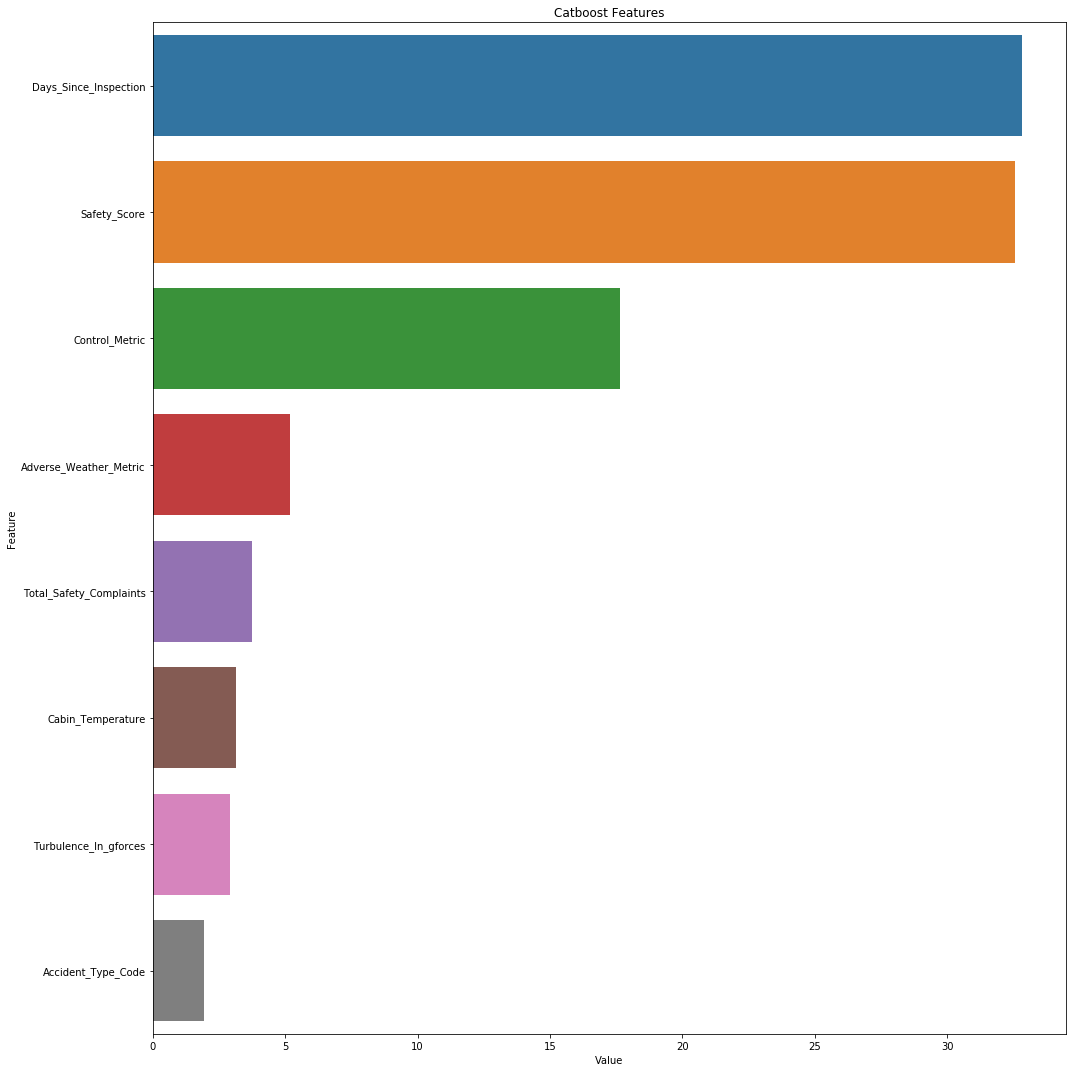

In [0]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test

In [0]:
from sklearn.model_selection import KFold

errcat = []
y_pred_totcat = []

fold = KFold(n_splits=4, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=10,
                         random_seed=42, 
                         iterations=300, 
                         learning_rate=0.7,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1, 
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
    cat.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200, cat_features=categorical_features_indices)

    y_pred_cat = cat.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred_cat))

    errcat.append(accuracy_score(y_test,y_pred_cat))
    p = cat.predict(Xtest)
    y_pred_totcat.append(p)

Accuracy:  0.9448
Accuracy:  0.9588
Accuracy:  0.9508
Accuracy:  0.9508


In [0]:
np.mean(errcat,0)

0.9513

In [0]:
cat_final = np.mean(y_pred_totcat,0).round().astype(int)
cat_final

array([[0],
       [2],
       [3],
       ...,
       [3],
       [3],
       [0]])

In [0]:
y_pred_class = le.inverse_transform(cat_final)
df_sub = pd.DataFrame(data=y_pred_class, columns=['Severity'])
df_sub.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Severity
0,Highly_Fatal_And_Damaging
1,Significant_Damage_And_Fatalities
2,Significant_Damage_And_Serious_Injuries
3,Highly_Fatal_And_Damaging
4,Significant_Damage_And_Fatalities


In [0]:
df_sub['Severity'].value_counts()

Highly_Fatal_And_Damaging                  738
Minor_Damage_And_Injuries                  680
Significant_Damage_And_Serious_Injuries    619
Significant_Damage_And_Fatalities          463
Name: Severity, dtype: int64

In [0]:
!pip install xlsxwriter

     |████████████████████████████████| 143kB 2.8MB/s 


In [0]:
writer = pd.ExcelWriter('a5.xlsx', engine='xlsxwriter')
df_sub.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()

In [0]:
from google.colab import files
files.download('a5.xlsx')

In [0]:
train_df=train

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Severity'] = le.fit_transform(train_df['Severity'])
le.classes_

array([0, 1, 2, 3])

In [0]:
X = train_df.drop(labels=['Severity'], axis=1)
y = train_df['Severity'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((7500, 8), (7500,), (2500, 8), (2500,))

In [0]:
from math import sqrt 
from sklearn.metrics import accuracy_score, mean_squared_error

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.2, n_estimators=1500, random_state=42, subsample=0.8)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print('RMSE', sqrt(mean_squared_error(y_cv, y_pred)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2769           0.1171           17.85s
         2           1.2162           0.0621           17.54s
         3           1.1181           0.0926           17.51s
         4           1.0734           0.0503           17.44s
         5           1.0110           0.0668           17.36s
         6           0.9684           0.0395           17.32s
         7           0.9194           0.0480           17.31s
         8           0.9002           0.0124           17.38s
         9           0.8881           0.0105           17.44s
        10           0.8536           0.0293           17.41s
        20           0.7010           0.0409           17.08s
        30           0.6059           0.0019           16.90s
        40           0.5543          -0.0004           16.80s
        50           0.5287           0.0008           16.60s
        60           0.5106          -0.0008           16.46s
       

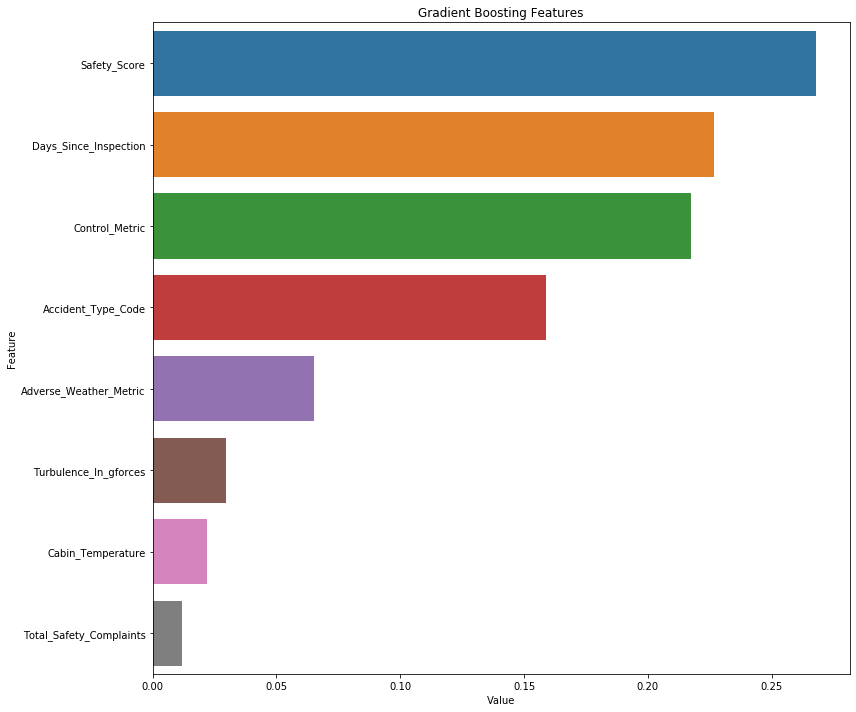

In [0]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test

In [0]:
from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=20, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    gb = GradientBoostingRegressor(learning_rate=0.2, n_estimators=1500, random_state=101, subsample=0.8)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    print('RMSE', sqrt(mean_squared_error(y_test, y_pred)))

    errgb.append(sqrt(mean_squared_error(y_test, y_pred)))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

RMSE 0.38900493995194124
RMSE 0.4283132378251944
RMSE 0.3906211616814502
RMSE 0.4221734289769725
RMSE 0.4432272998488303
RMSE 0.3989611975272858
RMSE 0.4024253337872938
RMSE 0.41857191011127276
RMSE 0.4287458202785892
RMSE 0.3870704675493248
RMSE 0.3907309087244243
RMSE 0.422680401742277
RMSE 0.37168961054671384
RMSE 0.45202164786654087
RMSE 0.42679621655228506
RMSE 0.43002949394800155
RMSE 0.34638654643223
RMSE 0.4199336024354775
RMSE 0.42048545095643836
RMSE 0.4052343673766162


In [0]:
np.mean(errgb)

0.409755152205958

In [0]:
cat_final = np.mean(y_pred_totgb,0).round().astype(int)
cat_final

array([0, 2, 3, ..., 3, 3, 0])

In [0]:
#y_pred_class = le.inverse_transform(cat_final)
df_sub = pd.DataFrame(data=cat_final, columns=['Severity'])
df_sub.head()

,Severity
0,0
1,2
2,3
3,1
4,1


In [0]:
df_sub['Severity'].value_counts()

 0    703
 1    689
 3    566
 2    533
 4      7
-1      2
Name: Severity, dtype: int64

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import files
files.upload()

Saving 85.18.csv to 85.18.csv
Saving 85.33.csv to 85.33.csv


{'85.18.csv': b'Accident_ID,Severity\r\n1,Highly_Fatal_And_Damaging\r\n10,Significant_Damage_And_Fatalities\r\n14,Significant_Damage_And_Serious_Injuries\r\n17,Highly_Fatal_And_Damaging\r\n21,Significant_Damage_And_Fatalities\r\n40,Significant_Damage_And_Fatalities\r\n45,Significant_Damage_And_Fatalities\r\n50,Highly_Fatal_And_Damaging\r\n52,Highly_Fatal_And_Damaging\r\n85,Significant_Damage_And_Serious_Injuries\r\n95,Significant_Damage_And_Serious_Injuries\r\n106,Significant_Damage_And_Serious_Injuries\r\n111,Highly_Fatal_And_Damaging\r\n123,Significant_Damage_And_Serious_Injuries\r\n129,Significant_Damage_And_Fatalities\r\n130,Significant_Damage_And_Serious_Injuries\r\n132,Highly_Fatal_And_Damaging\r\n137,Highly_Fatal_And_Damaging\r\n159,Minor_Damage_And_Injuries\r\n161,Significant_Damage_And_Fatalities\r\n162,Highly_Fatal_And_Damaging\r\n166,Significant_Damage_And_Serious_Injuries\r\n170,Significant_Damage_And_Fatalities\r\n173,Highly_Fatal_And_Damaging\r\n177,Highly_Fatal_And_Damag

In [0]:
from google.colab import files
files.upload()

Saving predictions.csv to predictions.csv


{'predictions.csv': b'Accident_ID,Severity\r\n1,Highly_Fatal_And_Damaging\r\n10,Significant_Damage_And_Fatalities\r\n14,Significant_Damage_And_Serious_Injuries\r\n17,Highly_Fatal_And_Damaging\r\n21,Significant_Damage_And_Fatalities\r\n40,Significant_Damage_And_Fatalities\r\n45,Significant_Damage_And_Fatalities\r\n50,Highly_Fatal_And_Damaging\r\n52,Highly_Fatal_And_Damaging\r\n85,Significant_Damage_And_Serious_Injuries\r\n95,Significant_Damage_And_Serious_Injuries\r\n106,Significant_Damage_And_Serious_Injuries\r\n111,Highly_Fatal_And_Damaging\r\n123,Significant_Damage_And_Serious_Injuries\r\n129,Significant_Damage_And_Fatalities\r\n130,Significant_Damage_And_Serious_Injuries\r\n132,Highly_Fatal_And_Damaging\r\n137,Significant_Damage_And_Fatalities\r\n159,Highly_Fatal_And_Damaging\r\n161,Significant_Damage_And_Fatalities\r\n162,Highly_Fatal_And_Damaging\r\n166,Significant_Damage_And_Serious_Injuries\r\n170,Significant_Damage_And_Fatalities\r\n173,Highly_Fatal_And_Damaging\r\n177,Highly_F

In [0]:
df1 = pd.read_csv('85.33.csv') # 0.84174
df2 = pd.read_csv('85.18.csv') # 0.84066
df3 = pd.read_csv('predictions.csv') # 0.84030

In [0]:
df1.head(2)

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Severity'] = le.fit_transform(df1['Severity'])
df2['Severity'] = le.transform(df2['Severity'])
df3['Severity'] = le.transform(df3['Severity'])
le.classes_

array(['Highly_Fatal_And_Damaging', 'Minor_Damage_And_Injuries',
       'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries'], dtype=object)

In [0]:
y_pred1 = np.array(df1['Severity'])
y_pred2 = np.array(df2['Severity'])
y_pred3 = np.array(df3['Severity'])

In [0]:
y_pred = y_pred1*0.5 + y_pred2*0.4 + y_pred3*0.1

In [0]:
y_pred

array([0., 2., 3., ..., 3., 3., 0.])

In [0]:
sub = pd.DataFrame(data=y_pred, columns=['Severity'])
sub = sub.round().astype(int)
sub.head(5)

,Severity
0,0
1,2
2,3
3,0
4,2


In [0]:

sub['Severity'].value_counts()

0    752
1    683
3    628
2    437
Name: Severity, dtype: int64

In [0]:

sub['Severity'] = le.inverse_transform(sub['Severity'])

In [0]:
sub['Severity'].value_counts()

Highly_Fatal_And_Damaging                  752
Minor_Damage_And_Injuries                  683
Significant_Damage_And_Serious_Injuries    628
Significant_Damage_And_Fatalities          437
Name: Severity, dtype: int64

In [0]:

sub.to_csv('ensemble.csv', index=False)

In [0]:
from google.colab import files
files.download('ensemble.csv')